# Кластеризация методом `K-means` для выделения групп объектов

In [ ]:
from keras.datasets import mnist
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [ ]:
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

In [ ]:
# посмотрим на данные
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
X[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  12,
          0,   6, 206, 253, 140,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  77, 251, 210,  25,   0,   0,
          0, 122, 248, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  31,  18,   0,   0,   0,
          0, 209, 253, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        117, 247, 253, 198,  10,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  76,
        247, 253, 231,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128,
        253, 253, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 176, 246,
        253, 159,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 234, 253,
        233,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 198, 253, 253,
        141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 248, 253, 189,
         12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  19, 200, 253, 253, 141,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 134, 253, 253, 173,  12,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  25,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  43,  20,
         20,  20,  20,   5,   0,   5,  20,  20,  37, 150, 150, 150, 147,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253, 253, 253,
        253, 253, 253, 168, 143, 166, 253, 253, 253, 253, 253, 253, 253,
        123,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253, 249, 247, 247, 169, 117, 117,
         57,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 123, 123, 123,
        166, 253, 253, 253, 155, 123, 123,  41,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
X[-1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   8, 117, 254, 220,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  95, 212, 253, 253, 253, 157,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         16,  95, 209, 253, 253, 253, 245, 125,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40,  96,
        206, 253, 254, 253, 253, 198,  64,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 182, 240, 253,
        253, 253, 254, 253, 198,  24,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  60,  60, 168,
        253, 253, 254, 200,  23,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  70, 247,
        253, 253, 245,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  75, 207, 253,
        253, 207,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79, 219, 253, 253,
        253, 138,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 105, 250, 253, 253, 253,
         34,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  95, 254, 254, 254, 254,  94,
          0,   0,   0,   0,   0,   3,  13,  13,  13,   8,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 107, 253, 253, 253, 204,  15,
          0,   0,   0,   0,  21, 166, 253, 253, 253, 212,  25,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  33, 217, 253, 253, 132,  64,   0,
          0,  18,  43, 157, 171, 253, 253, 253, 253, 253, 160,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3, 166, 253, 253, 242,  49,  17,  49,
        158, 210, 254, 253, 253, 253, 253, 253, 253, 253, 253,  11,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  10, 227, 253, 253, 207,  15, 172, 253,
        253, 253, 254, 247, 201, 253, 210, 210, 253, 253, 175,   4,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  10, 228, 253, 253, 224,  87, 242, 253,
        253, 184,  60,  54,   9,  60,  35, 182, 253, 253,  52,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  13, 253, 253, 253, 253, 231, 253, 253,
        253,  93,  86,  86,  86, 109, 217, 253, 253, 134,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2, 115, 253, 253, 253, 253, 253, 253,
        253, 253, 254, 253, 253, 253, 253, 253, 134,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3, 166, 253, 253, 253, 253, 253,
        253, 253, 254, 253, 253, 253, 175,  52,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7,  35, 132, 225, 253, 253,
        253, 195, 132, 132, 132, 110,   4,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y[0], y[1], y[-1]

(7, 2, 6)

Пример вывода нескольких объектов и соответствующих меток классов:

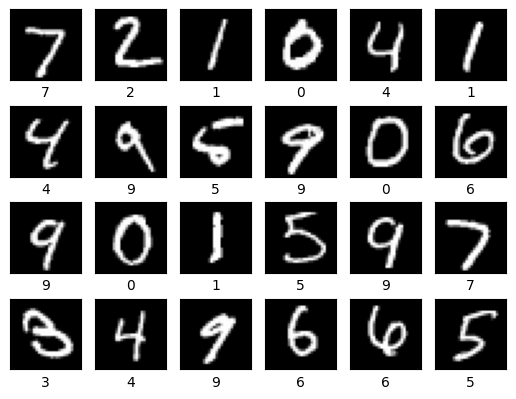

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i], color='black')

Введите <code>.shape</code> полученного набора данных

In [ ]:
print('Shapes')
print(f'X: {X.shape}')
print(f'y: {y.shape}')

Shapes
X: (10000, 28, 28)
y: (10000,)


При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [ ]:
# разобьем набор данных на тренеровочную и тестовую выборки с параметрами test_size=0.2, random_state=21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print('Shapes', '      X', '         y')
print('train', X_train.shape, y_train.shape)
print('test ', X_test.shape, y_test.shape)

Shapes       X          y
train (8000, 28, 28) (8000,)
test  (2000, 28, 28) (2000,)


Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [ ]:
# распрямим изображения
X_train = X_train.reshape(X_train.shape[0], -1) # сохраняем первое измерение (кол-во изображений) и распрямляем сами изображения в одно
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# посмотрим на форму полученных массивов
print('Shapes')
print('X_train', X_train.shape)
print('X_test ', X_test.shape)

Shapes
X_train (8000, 784)
X_test  (2000, 784)


In [ ]:
# обучим алгоритм KMeans с параметрами random_state=21, n_clusters=10
kmeans = KMeans(random_state=21, n_clusters=10).fit(X_train)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [ ]:
# определим число элементов, отнесенных к кластеру с меткой 1
train_clusters = kmeans.labels_ # получение меток кластеров для каждого элемента из X_train (в какую по счету группу из 10 его отнесла система)
print(f'Кол-во элементов кластера 1: {sum(train_clusters == 1)}')

Кол-во элементов кластера 1: 634


Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



In [ ]:
# получаем центроид для каждого кластера - среднее значение всех точек - пикселей изображений, принадлежащих данному кластеру
centroids = kmeans.cluster_centers_
centroids.shape

(10, 784)

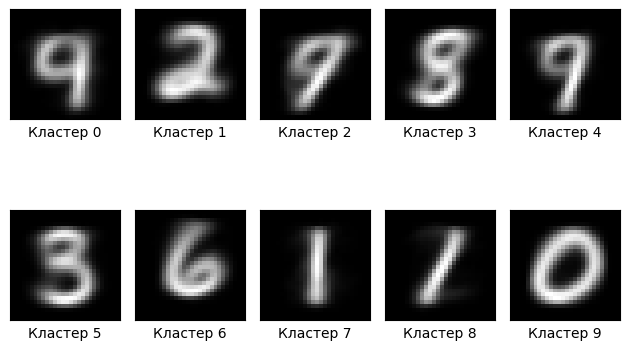

In [ ]:
# построим изображения, соответствующие центроидам
fig, ax = plt.subplots(2, 5)

for i, axi in enumerate(ax.flat):
  centroid = centroids[i].reshape(28, 28)
  axi.imshow(centroid, cmap='gray')
  axi.set(xticks=[], yticks=[])
  axi.set_xlabel(f'Кластер {i}', color='black')

plt.tight_layout()

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [ ]:
cluster_labels = []
for i in range(10):
    cluster_indices = np.where(train_clusters == i)[0] # получаем индексы элементов, которым присвоено значение (от 0 до 9)
    cluster_digit_labels = y_train[cluster_indices] # по этим индексам получаем элементы из y_train (реальные метки)
    # находим наиболее часто встречающуюся метку
    most_common_label = np.bincount(cluster_digit_labels).argmax() # считаем все уникальные цифры и находим самые часто встречаемые
    cluster_labels.append(most_common_label)
print(f'Разумные метки кластеров: {cluster_labels}')

Разумные метки кластеров: [4, 2, 7, 8, 7, 3, 6, 1, 1, 0]


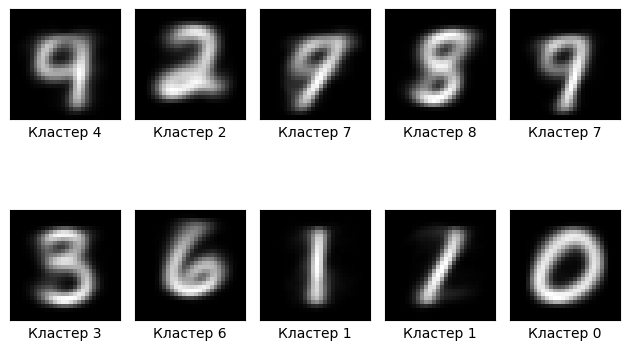

In [ ]:
# построим изображения, соответствующие центроидам с правильными метками
fig, ax = plt.subplots(2, 5)

for i, axi in enumerate(ax.flat):
  centroid = centroids[i].reshape(28, 28)
  axi.imshow(centroid, cmap='gray')
  axi.set(xticks=[], yticks=[])
  axi.set_xlabel(f'Кластер {cluster_labels[i]}', color='black')

plt.tight_layout()

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [ ]:
predicted_labels = [cluster_labels[i] for i in train_clusters]
accuracy = accuracy_score(y_train, predicted_labels)
print(f'accuracy score: {round(accuracy, 3)}')

accuracy score: 0.59


При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [ ]:
# произведем кластеризацию тестовых данных
test_clusters = kmeans.predict(X_test)

In [ ]:
# переименуем метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования
predicted_test_labels = [cluster_labels[i] for i in test_clusters]

Вычислите точность модели на тестовых данных.

In [ ]:
accuracy = accuracy_score(y_test, predicted_test_labels)
print(f'accuracy score: {round(accuracy, 3)}')

accuracy score: 0.588


Постройте матрицу ошибок.

In [ ]:
# построим матрицу ошибок
conf_matrix = confusion_matrix(y_test, predicted_test_labels)
conf_matrix

array([[164,   0,   0,  13,   0,   0,   6,   8,  15,   0],
       [  0, 213,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,  26, 145,   9,   6,   0,   5,   7,   6,   0],
       [  0,  15,  10, 135,   4,   0,   2,   3,  39,   0],
       [  0,   6,   0,   0,  77,   0,   3,  88,   0,   0],
       [  1,  14,   0,  65,   6,   0,   2,  38,  60,   0],
       [  4,   8,   2,   0,   5,   0, 155,   0,  10,   0],
       [  1,  19,   2,   0,  26,   0,   0, 177,   0,   0],
       [  4,  15,   2,  37,   4,   0,   5,  24, 109,   0],
       [  0,   2,   0,   2,  64,   0,   0, 127,   3,   0]])

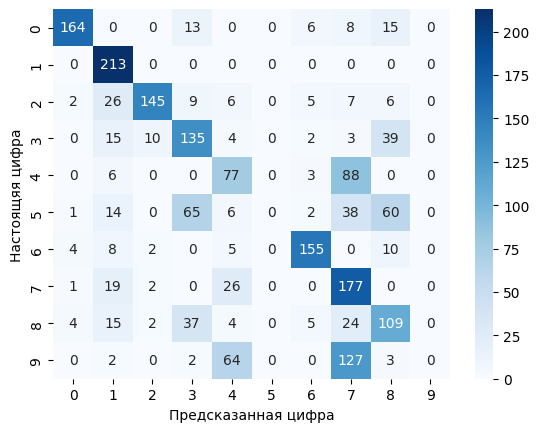

In [ ]:
# сделаем тепловую карту матрицы ошибок для наглядности
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=range(10), yticklabels=range(10), fmt='d')
plt.xlabel("Предсказанная цифра")
plt.ylabel("Настоящяя цифра")
plt.show()

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [ ]:
# определим, с какой цифрой модель чаще всего путала цифру 9
confused_index = np.argmax(conf_matrix[9])
print(f'Цифру 9 чаще всего путали с цифрой {confused_index}')

Цифру 9 чаще всего путали с цифрой 7


Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

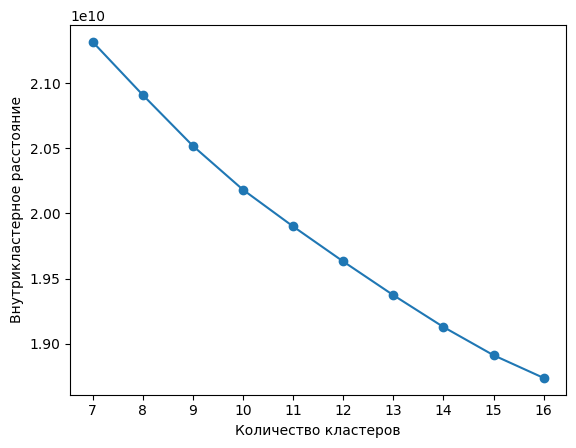

In [ ]:
inertia = [] # список сумм внутрикластерных расстояний для каждой модели
for k in range(7, 17):
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(7, 17), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')
plt.xticks(range(7, 17))
plt.show()

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [ ]:
# преобразуем тренировочный набор данных при помощи метода TSNE с параметрами n_components=2, init='random', random_state=21
X_train = TSNE(n_components=2, init='random', random_state=21).fit_transform(X_train)

print(f'X_train shape: {X_train.shape}')

X_train shape: (8000, 2)


Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [ ]:
# произведем кластеризацию полученного набора данных при помощи KMeans с параметрами n_clusters=10, random_state=21
kmeans = KMeans(n_clusters=10, random_state=21).fit(X_train)

In [ ]:
# переназначим метки кластеров на основе метки большинства объектов в рамках кластера
train_clusters = kmeans.labels_

cluster_labels = []
for i in range(10):
    cluster_indices = np.where(train_clusters == i)[0]
    cluster_digit_labels = y_train[cluster_indices]
    most_common_label = np.bincount(cluster_digit_labels).argmax()
    cluster_labels.append(most_common_label)

predicted_labels = [cluster_labels[i] for i in train_clusters]

In [ ]:
# оценим точность модели на тренировочных данных
accuracy = accuracy_score(y_train, predicted_labels)
print(f'accuracy score: {round(accuracy, 3)}')

accuracy score: 0.824


Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.